# Week 03 Feature Engineering

In [73]:
import pandas as pd
import numpy as np
import ta as ta

In [19]:
row_data_path = '../../data/row/'
processed_data_path = '../../data/processed/'
NVDA_5_years_daily_data = pd.read_csv(
    row_data_path + 'NVDA_5_years_daily_data.csv', index_col='date', parse_dates=True)

In [74]:
NVDA_5_years_daily_data_renamed = NVDA_5_years_daily_data.rename(columns={"1. open": "open",
                                                                          "2. high": "high",
                                                                          "3. low": "low",
                                                                          "5. adjusted close": "close",
                                                                          "6. volume": "volume"})

## Feature Extraction

[Technical Analysis Library in Python](https://github.com/bukosabino/ta) 

Example adding all features:

In [ ]:
df = ta.add_all_ta_features(df=NVDA_5_years_daily_data_renamed.copy(), 
                            open="open",
                            high="high",
                            low="low",
                            close="close",
                            volume="volume")
df.to_csv(processed_data_path + "ta_all_features_data_NVDA.csv")

1. Convert volume to log space

In [22]:
NVDA_5_years_daily_data_renamed['log_volume'] = np.log(NVDA_5_years_daily_data_renamed['volume'])

2. Compute daily returns (difference)

In [23]:
NVDA_5_years_daily_data_renamed['daily_returns'] = NVDA_5_years_daily_data_renamed['close'].diff()

3. Calculate MA-5

Moving Average(MA)

<Axes: title={'center': 'NVDA Close Prices and MA-5'}, xlabel='date'>

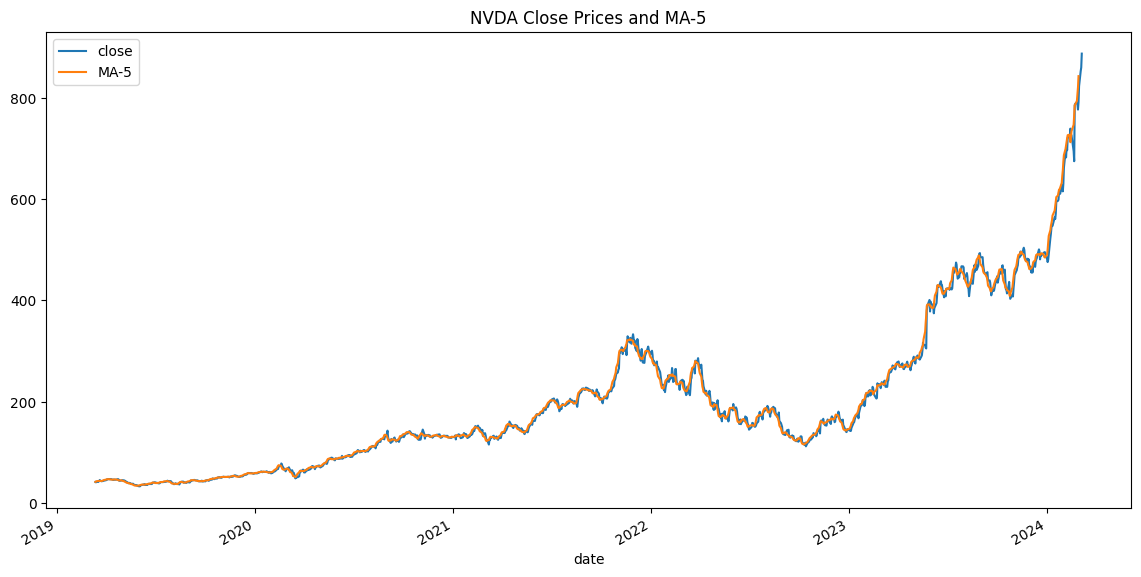

In [72]:
NVDA_5_years_daily_data_renamed['MA-5'] = NVDA_5_years_daily_data_renamed['close'].rolling(
    window=5).mean()

# Plotting MA-5 as an example
NVDA_5_years_daily_data_renamed[['close', 'MA-5']
                        ].plot(figsize=(14, 7), title="NVDA Close Prices and MA-5")

4. Calculate MA-30

In [ ]:
NVDA_5_years_daily_data_renamed['MA-30'] = NVDA_5_years_daily_data_renamed['close'].rolling(
    window=30).mean()

5. Calculate Relative Strength Index (RSI)

The relative strength index (RSI) is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.

The RSI can do more than point to overbought and oversold securities. It can also indicate securities that may be primed for a trend reversal or corrective pullback in price. It can signal when to buy and sell. Traditionally, 
- an RSI reading of 70 or above indicates an overbought situation. 
- A reading of 30 or below indicates an oversold condition.

When date number doesn't accumulate to 14:

$$
R S I_{\text {step one }}=100-\left[\frac{100}{1+\frac{\text { Average gain }}{\text { Average loss }}}\right]
$$

Once there are 14 periods of data available, the second calculation can be done. 

$$
R S I_{\text {step two }}=100-\left[\frac{100}{1+\frac{\text { (Previous Average Gain } \times 13)+ \text { Current Gain }}{(\text { (Previous Average Loss } \times 13)+\text { Current Loss })}}\right]
$$

In [ ]:
RSI = ta.momentum.RSIIndicator(
    NVDA_5_years_daily_data_renamed['close'], window=14)
NVDA_5_years_daily_data_renamed['RSI'] = RSI.rsi()

6. Calculate 5-day variance

In [ ]:
NVDA_5_years_daily_data_renamed['5-day_variance'] = NVDA_5_years_daily_data_renamed['close'].rolling(
    window=5).var()

7. Calculate Williams %R

Williams %R, also known as the Williams Percent Range, is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels. 

The Williams %R may be used to find entry and exit points in the market. The indicator is very similar to the Stochastic oscillator and is used in the same way. It was developed by Larry Williams and it compares a stock’s closing price to the high-low range over a specific period, typically 14 days or periods.

The Formula for the Williams \%R Is:
$$
\text { Wiliams } \% R=\frac{\text { Highest High }- \text { Close }}{\text { Highest High }- \text { Lowest Low }}
$$

In [ ]:
WILLR = ta.momentum.WilliamsRIndicator(high=NVDA_5_years_daily_data_renamed['high'],
                                       low=NVDA_5_years_daily_data_renamed['low'],
                                       close=NVDA_5_years_daily_data_renamed['close'],
                                       lbp=14)
NVDA_5_years_daily_data_renamed['Williams_%R'] = WILLR.williams_r()

8. Calculate z-score for daily close prices

$$
Z = \frac{x - \mu}{\sigma}
$$

In [ ]:
NVDA_5_years_daily_data_renamed['z_score'] = (NVDA_5_years_daily_data_renamed['close'] - NVDA_5_years_daily_data_renamed['close'].mean()) / NVDA_5_years_daily_data_renamed['close'].std()

9. 

In [25]:
NVDA_5_years_daily_data_renamed

,open,high,low,4. close,close,volume,7. dividend amount,8. split coefficient,log_volume,daily_returns,MA-5
date,,,,,,,,,,,
2024-03-12,880.490,919.60,861.5000,919.13,919.130000,65437480.0,0.0,1.0,17.996606,NaN,NaN
2024-03-11,864.290,887.97,841.6600,857.74,857.740000,66611510.0,0.0,1.0,18.014388,-61.390000,NaN
2024-03-08,951.379,974.00,865.0600,875.28,875.280000,114226906.0,0.0,1.0,18.553697,17.540000,NaN
2024-03-07,901.580,927.67,896.0201,926.69,926.690000,60811916.0,0.0,1.0,17.923296,51.410000,NaN
2024-03-06,880.220,897.24,870.3001,887.00,887.000000,58252030.0,0.0,1.0,17.880289,-39.690000,893.168000
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-19,172.760,177.50,172.0800,175.71,43.629332,21374310.0,0.0,1.0,16.877700,0.325277,43.966031
2019-03-18,171.080,173.25,167.8600,168.95,41.950803,12174829.0,0.0,1.0,16.314881,-1.678529,43.726170
2019-03-15,167.300,171.53,167.1600,169.81,42.164344,16536482.0,0.0,1.0,16.621080,0.213541,43.344280


In [26]:
# Save the enhanced dataset
NVDA_5_years_daily_data_renamed.to_csv(processed_data_path + 'features_NVDA.csv')

print("Enhanced dataset saved successfully.")

Enhanced dataset saved successfully.


## Feature Engineering

In [75]:
NVDA_5_years_daily_data_renamed.dropna(inplace=True)
NVDA_5_years_daily_data_renamed

,open,high,low,4. close,close,volume,7. dividend amount,8. split coefficient,log_volume,daily_returns,MA-5
date,,,,,,,,,,,
2024-02-29,790.94,799.9000,783.50,791.12,791.083190,50728898.0,0.0,1.0,17.742006,-31.668526,842.561049
2024-02-28,776.20,789.3300,771.25,776.63,776.593864,39311040.0,0.0,1.0,17.487016,-14.489326,820.479822
2024-02-27,793.81,794.8000,771.62,787.01,786.973381,39170524.0,0.0,1.0,17.483435,10.379517,805.946498
2024-02-26,797.00,806.4599,785.05,790.92,790.883199,50397273.0,0.0,1.0,17.735448,3.909818,793.657070
2024-02-23,807.90,823.9400,775.70,788.17,788.133327,82938837.0,0.0,1.0,18.233614,-2.749872,786.733392
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-19,172.76,177.5000,172.08,175.71,43.629332,21374310.0,0.0,1.0,16.877700,0.325277,43.966031
2019-03-18,171.08,173.2500,167.86,168.95,41.950803,12174829.0,0.0,1.0,16.314881,-1.678529,43.726170
2019-03-15,167.30,171.5300,167.16,169.81,42.164344,16536482.0,0.0,1.0,16.621080,0.213541,43.344280


In [102]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
import numpy as np

### Step 1: Time Series Split

In [77]:
# Define features and target variable
X = NVDA_5_years_daily_data_renamed.drop(['close', '4. close'], axis=1)
y = NVDA_5_years_daily_data_renamed['close']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

### Step 2: Gradient Boosting Regression

Train a Gradient Boosting Regression model within a cross-validation loop, compute RMSE for each split, and use PCA if necessary due to high dimensionality:

In [78]:
rmse_scores = []

for test_train, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[test_train], X_scaled[test_index]
    y_train, y_test = y.iloc[test_train], y.iloc[test_index]

    # Train the model
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE and append to scores list
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print(f"Average RMSE: {np.mean(rmse_scores)}")

Average RMSE: 100.30826827921406


### Step 3: Feature Importance and Model Comparison

After training, extract feature importance and consider removing low-importance features or testing other models for comparison:

In [79]:
feature_importance = model.feature_importances_
# Filter or modify features based on importance as needed
feature_names = X.columns

# Combine feature names and their importances into a DataFrame for easier analysis
importances_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the sorted importances
print("Feature Importances:")
print(importances_df)

Feature Importances:
                Feature  Importance
8                  MA-5    0.925136
2                   low    0.040741
1                  high    0.024299
0                  open    0.008983
7         daily_returns    0.000769
6            log_volume    0.000042
3                volume    0.000029
4    7. dividend amount    0.000002
5  8. split coefficient    0.000000


### Step 4: Reducing the Dimensions with Set Threshold

In [80]:
# Define a threshold below which features are considered of low importance
# For demonstration, using 0.01 (1%) as the threshold
threshold = 0.01

# Identify features with importance below the threshold
low_importance_features = importances_df[importances_df['Importance']
                                         < threshold]['Feature']

X_filtered = X.drop(columns=low_importance_features)

In [81]:
def test_train(X, y, model_func=GradientBoostingRegressor()):
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)

    rmse_scores = []

    for train_index, test_index in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model = model_func
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate RMSE and append to scores list
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    print(f"Average RMSE: {np.mean(rmse_scores)}")
    feature_importance = model.feature_importances_
    # Filter or modify features based on importance as needed
    feature_names = X.columns

    # Combine feature names and their importances into a DataFrame for easier analysis
    importances_df = pd.DataFrame(
        {'Feature': feature_names, 'Importance': feature_importance})

    # Sort the DataFrame by importance in descending order
    importances_df.sort_values(by='Importance', ascending=False, inplace=True)

    # Display the sorted importances
    print("Feature Importances:")
    print(importances_df)

In [82]:
test_train(X_filtered, y=y)

Average RMSE: 102.33121007398553
Feature Importances:
  Feature  Importance
2    MA-5    0.926315
1     low    0.048530
0    high    0.025155


### Step 5: PCA for Dimensionality Reduction

If the feature dimension is too large, you might consider applying PCA before training:

In [83]:
# Apply PCA
# Retain 95% of variance or choose the number of components
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Transform PCA results into a DataFrame with meaningful column names
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
# Ensure to match the original index
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=X.index)

# Now X_pca_df can be used for further analysis or modeling
print(X_pca_df.head())

                 PC1       PC2       PC3       PC4       PC5
date                                                        
2024-02-29  5.372941  4.102636  2.251187 -0.349890 -2.645017
2024-02-28  5.246036  3.328306  0.881295 -0.117910 -1.025730
2024-02-27  5.158010  2.969632 -1.161194  0.176822  1.412098
2024-02-26  5.141772  3.481560 -0.668314  0.074938  0.836887
2024-02-23  4.908681  4.741179 -0.213313 -0.078642  0.323273


In [84]:
test_train(X=X_pca_df, y=y)

Average RMSE: 124.16874171080686
Feature Importances:
  Feature  Importance
1     PC2    0.566970
0     PC1    0.429109
4     PC5    0.001711
2     PC3    0.001516
3     PC4    0.000694


### Step 6: Encapsulating the Process
Finally, encapsulate your data preprocessing, model training, and prediction steps into a function for reuse:

In [93]:
def train_and_predict(data, model_func=GradientBoostingRegressor()):
    data = data.rename(columns={"1. open": "open",
                                "2. high": "high",
                                "3. low": "low",
                                "5. adjusted close": "close",
                                "6. volume": "volume"})
    data.dropna(inplace=True)
    
    # Define features and target variable
    X = data.drop(['close', '4. close'], axis=1)
    y = data['close']
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Retain 95% of variance or choose the number of components
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)

    X_scaled = scaler.fit_transform(X_pca)
    
    # Initialize TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)

    rmse_scores = []

    for train_index, test_index in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model = model_func
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate RMSE and append to scores list
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    print(f"Average RMSE: {np.mean(rmse_scores)}")

In [97]:
train_and_predict(NVDA_5_years_daily_data, model_func=GradientBoostingRegressor())

Average RMSE: 124.68592806000682


In [98]:
train_and_predict(NVDA_5_years_daily_data, model_func=LinearRegression())

Average RMSE: 371.44069642100726


In [103]:
train_and_predict(NVDA_5_years_daily_data, model_func=tree.DecisionTreeRegressor())

Average RMSE: 142.81036806640594
